# Machine Learning: Programming Exercise 

## Linear Regression
In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

To get started with the exercise, you will need to download the starter code and unzip its contents to the directory where you wish to complete the exercise. If needed, use the cd command in Octave/MATLAB to change to this directory before starting this exercise.

You can also ﬁnd instructions for installing Python down below. These notebooks use Python 3.6 but should be compatible with Python 2 as well

Operating System | Blog Post | Youtube Video
--- | --- | ---
Mac | [Install Anaconda on Mac](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072#.lvhw2gt3k) | [Youtube Video](https://www.youtube.com/watch?v=B6d5LrA8bNE)
Ubuntu | [Install Anaconda on Ubuntu](https://medium.com/@GalarnykMichael/install-python-on-ubuntu-anaconda-65623042cb5a#.4kwsp0wjl) | [Youtube Video](https://www.youtube.com/watch?v=jo4RMiM-ihs)
Windows | [Install Anaconda on Windows](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444#.66f7y3whf) | [Youtube Video](https://www.youtube.com/watch?v=KH2yIk03jFc&t=1s)
Any | [Environment Management with Conda (Python 2 + 3, Configuring Jupyter Notebooks)](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444#.66f7y3whf) | [Youtube Video](https://www.youtube.com/watch?v=rFCBiP9Gkoo)

Prepare the python environment

```shell
conda install numpy matplotlib plotly pandas
```

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
%matplotlib inline

## 1. A simple MATLAB function

The first part of this script gives you practice with MATLAB syntax and the homework submission process. In the file warmUpExercise.m, you will find the outline of a MATLAB function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

```matlab
# TODO: update this code to python code
A = eye(5); 
```

When you are finished, save warmUpExercise.m, then run the code contained in this section to call warmUpExercise(). 

**5x5 Identity Matrix:**

```matlab
warmUpExercise()
```

## 2. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. The `ex1.py` script has already been set up to load this data for you.

### 2.1 Plotting the data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.
Run the code below to load the dataset from the data file into the variables X and y:

Run the code below to load the dataset from the data file into the variables X and y:

```matlab
data = load('ex1data1.txt'); % read comma separated data
X = data(:, 1); y = data(:, 2);
```

Your job is to complete **plotData.m** to draw the plot; modify the file and fill in the following code:

```matlab
plot(x, y, 'rx', 'MarkerSize', 10); % Plot the data
ylabel('Profit in $10,000s'); % Set the y-axis label
xlabel('Population of City in 10,000s'); % Set the x-axis label
```

Once you are finished, save plotData.m, and execute the code in this section which will call plotData.

```matlab
plotData(X,y)
```

To learn more about the plot command, you can run the command **help plot** at the command prompt, type plot() inside the MATLAB Live Editor and click on the "(?)" tooltip, or you can search the MATLAB documentation for "plot". Note that to change the markers to red x's in the plot, we used the option: **'rx'** together with the `plot` command, i.e.,

```matlab
plot(..,[your options here],..,'rx');
```

##### Python version

In this script, the dataset is loaded from the data ﬁle into the variables X and y:

In [3]:
# start by loading the data
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

# initialize some useful variables
m = len(data)  # the number of training examples

# Add x0, a vector of 1's, to X.
X = np.append(np.ones((m, 1)), np.array(
    data["Population"]).reshape((m, 1)), axis=1)
y = np.array(data["Profit"]).reshape(m, 1)

data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [17]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [ ]:
## Alternative version of using numpy directly.
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:, 0]
y = data[:, 1]
m = len(y)  # number of training examples

**Visualising the data**

Plotting helps us get insight in the data we are working with. Using the 'bx' option, we get blue crosses. You can read more about markers [here](https://matplotlib.org/api/markers_api.html).

Next, the script calls the plotData function to create a scatter plot of the data. Your job is to complete `plotData.py` to draw the plot; modify the ﬁle and ﬁll in the following code:

Text(0.5, 1.0, 'Relation between profit and population')

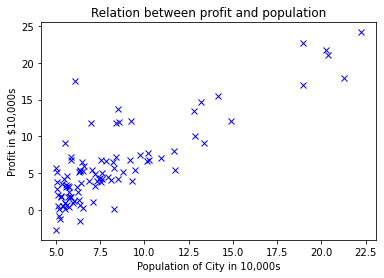

In [13]:
plt.plot(data['Population'], data['Profit'], 'bx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Relation between profit and population')

## Alternative version
# plt.plot(X, y, 'rx', markersize=10, label='Training data')
# plt.xlabel('Population of City in 10,000s')
# plt.ylabel('Profit in $10,000s')
# plt.show()


In [11]:
fig = px.scatter(data, x="Population", y="Profit")
fig.show()

### 2.2 Gradient Descent

In this section, you will fit the linear regression parameters to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$
J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^m ( h_{\theta}(x^{(i)})-y^{(i)} )^{2}
$$

where the hypothesis $h_\theta(x)$ is given by the linear model

$$
h_\theta(x) = \theta^Tx =\theta_{0}+\theta_{1}x_1
$$

The training examples are stored in X row-wise, like such:

$$
\begin{align*}
X =
\begin{bmatrix}
  x^{(1)}_0 & x^{(1)}_1  \newline
  x^{(2)}_0 & x^{(2)}_1  \newline
  x^{(3)}_0 & x^{(3)}_1
\end{bmatrix}
&,\theta =
\begin{bmatrix}
  \theta_0 \newline
  \theta_1 \newline
\end{bmatrix}
\end{align*}
$$

You can calculate the hypothesis as a column vector of size (m x 1) with:

$$
{{h}_{\theta }}\left( X \right)=X{\theta }
$$

Recall that the parameters of your model are the $\theta$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}((h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}\ (\text{simultaneously update } \theta_j \text{ for all }j) 
$$

With each step of gradient descent, your parameters $j$ come closer to the optimal values that will achieve the lowest cost $j(\theta)$.

**Implementation Note:** We store each example as a row in the the X matrix in MATLAB. To take into account the intercept term ($\theta_0$), we add an additional first column to **X** and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.

##### Vectorized Implementation - python version

Vectorizations is the act of replacing the loops in a computer program with matrix operations. If you have a good linear algebra library (like numpy), the library will optimize the code automatically for the computer the code runs on. Mathematically, the 'regular' function should mean the same as the vectorized function.

Gradient descent vectorized: $\theta = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta-\vec{y})$

#### 2.2.2 Implementation

In this script, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Run the code below to initialize the parameters to 0 and the learning rate alpha to 0.01. 

```matlab
m = length(X); % number of training examples
X = [ones(m,1),data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters
iterations = 1500;
alpha = 0.01;
```

#### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code in the file `computeCost.m`, which is a function that computes $J(\theta)$. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.

Once you have completed the function definition, run this section. The code below will call computeCost once using $\theta$ initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of 32.07 for the first output below:

```matlab
% Compute and display initial cost with theta all zeros
computeCost(X, y, theta)
```
Next we call computeCost again, this time with non-zero theta values as an additional test. You should expect to see an output of 54.24 below:

```matlab
% Compute and display initial cost with non-zero theta
computeCost(X, y,[-1; 2])
```

If the outputs above match the expected values, you can submit your solution for assessment. If the outputs do not match or you receive an error, check your cost function for mistakes, then rerun this section once you have addressed them.


##### Python version

**Exercise:** Implement a vectorized implementation of the cost function.

In [3]:
def computeCost(X, y, theta):
    """ Computes the cost of using theta as the parameter for linear gression to fit the data in X and y. """
    m = len(y) # number of training examples
    J = sum(np.square((X @ theta) - y)) / (2 * m)
    return J
    # return (1 / (2 * m)) * sum(np.square((X @ theta) - y)) # version 2

With $\theta = \begin{bmatrix}0 & 0\end{bmatrix}$ , $J(\theta)$ should return 32.07.

In [63]:
initial_theta = np.zeros((2,1))
print(computeCost(X, y, initial_theta))

[32.07273388]


In [60]:
# Debug the computeCost function
X.shape, initial_theta.shape, y.shape

((97, 2), (2, 1), (97, 1), array([[0., 0.]]))

In [6]:
# TEST CASE
print(computeCost(np.array([[1, 2], [1, 3], [1, 4], [1, 5]]), np.array([7, 6, 5, 4]), np.array(
    [0.1, 0.2])))  # should be 11.9450


11.945


In [7]:
# TEST CASE
print(computeCost(np.array([[1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6]]), np.array([7, 6, 5, 4]), np.array(
    [0.1, 0.2, 0.3])))  # should be 7.0175


7.017499999999999


#### 2.2.4 Gradient Descent

Next, you will implement gradient descent in the file `gradientDescent.m`. The loop structure has been written for you, and you only need to supply the updates to  within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the equations given earlier and to the video lectures if you are uncertain.

A good way to verify that gradient descent is working correctly is to look at the value of $J$ and check that it is decreasing with each step. The starter code for `gradientDescent.m` calls `computeCost` on every iteration and prints the cost. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

After you are finished, run this execute this section. The code below will use your final parameters to plot the linear fit. The result should look something like Figure 2 below:

Your final values for  will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

```matlab
% Run gradient descent:
% Compute theta
theta = gradientDescent(X, y, theta, alpha, iterations);

% Print theta to screen
% Display gradient descent's result
fprintf('Theta computed from gradient descent:\n%f,\n%f',theta(1),theta(2))
```

```matlab
% Plot the linear fit
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure
```

```matlab
% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n', predict1*10000);
```

```matlab
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n', predict2*10000);
```

Note the way that the lines above use matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of _code vectorization_ in **MATLAB**. 

#### Python version

We want are hypothesis $h_\theta(x)$ to function as good as possibly. Therefore, we want to minimalize the cost function J(\theta). Gradient descent is an algorithm used to do that.

The formal definition of gradient descent:

$$
repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}
$$

An illustration of gradient descent on a single variable:

![gradientdescent](https://github.com/rickwierenga/CS229-Python/raw/8c899e94c7bdf60031ce0b80402285820ce1cb44/ex1/notes/gradientdescent.png)

**Exercise:** Implement the gradient descent algorithm in Python.

In [9]:
def gradientDescent(X, y, theta, alpha, iterations):
    """ Performs gradient descent to learn theta. 
    Returns the found value for theta and the history of the cost function.
    """
    m = len(y) # number of training examples
    J_history = np.zeros((iterations, 1))

    for i in range(iterations):
        # Find the new values for theta.
        # Note: the new values must be assigned after the computation because theta is used during the computation.
        theta = theta - (alpha / m) * X.T @ (X @ theta - y)

        # Save the cost J in every iteration
        J_history[i] = computeCost(X, y, theta)
    
    return theta, J_history

Gradient descent should have found approximately the following: $\theta = \begin{bmatrix}-3.6303\\1.1664\end{bmatrix}$

In [67]:
# You can change different values for these variables
alpha = 0.01
iterations = 1500

theta, J_history = gradientDescent(X, y, initial_theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

In [16]:
# TEST CASE
t_theta, t_J_hist = gradientDescent(np.array([[1, 5], [1, 2], [1, 4], [1, 5]]), np.array([1, 6, 4, 2]), np.array([0,0]), 0.01, 1000)

print(t_theta)  # should be [ 5.21475495 -0.57334591]
print(t_J_hist[0])  # should be [5.97937031]
print(t_J_hist[999])  # should be [0.85426426]


[ 5.21475495 -0.57334591]
[5.97937031]
[0.85426426]


In [17]:
# TEST CASE
t_theta, t_J_hist = gradientDescent(np.array([[1, 5], [1, 2]]), np.array([1, 6]), np.array([0.5,0.5]), 0.1, 10)

print(t_theta)  # should be [1.70986322 0.19229354]
print(t_J_hist)  # should be [[5.8853125 ][5.71385195][5.54754384][5.38612137][5.22940887][5.07725972][4.9295384][4.78611529][4.6468651][4.51166638]]

[1.70986322 0.19229354]
[[5.8853125 ]
 [5.71385195]
 [5.54754384]
 [5.38612137]
 [5.22940887]
 [5.07725972]
 [4.9295384 ]
 [4.78611529]
 [4.6468651 ]
 [4.51166638]]


##### Plotting the regularization line

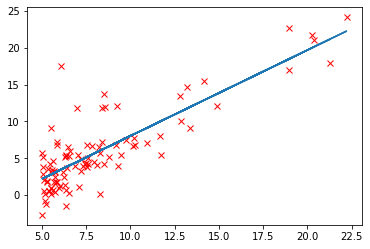

In [70]:
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.plot(X[:,1], X.dot(theta), label='Linear regression')

##### Plotting the cost history

A plot of how $J(\theta)$ decreases over time. This is are model learning.

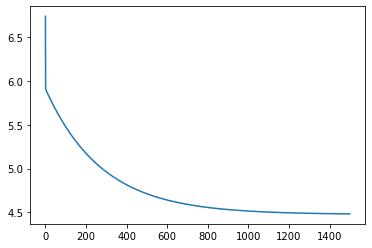

In [71]:
plt.plot(J_history)

##### Making a prediction using the model

The model can be used by calculating the dot product of the input and $\theta$.

In [74]:
prediction1 = np.array([1, 3.5]).dot(theta) * 10000 # don't forget to multiply the prediction by 10000
'In a city with a population of 35000, we predict a profit of $%.2f' % prediction1

'In a city with a population of 35000, we predict a profit of $4519.77'

In [75]:
prediction2 = np.array([1, 7]).dot(theta) * 10000
'In a city with a population of 70000, we predict a profit of $%.2f' % prediction2

'In a city with a population of 70000, we predict a profit of $45342.45'

### 2.3 Debugging

Here are some things to keep in mind as you implement gradient descent:

- MATLAB array indices start from one, not zero. If you're storing $\theta_0$ and $\theta_1$ in a vector called **theta**, the values will be **theta(1)** and **theta(2)**.

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you're adding and multiplying matrices of compatible dimensions. Printing the dimensions of variables with the size command will help you debug.

- By default, MATLAB interprets math operators to be matrix operators. This is a common source of size incompatibility errors. If you don't want matrix multiplication, you need to add the "dot" notation to specify this to MATLAB. For example, A*B does a matrix multiply, while A.*B does an element-wise multiplication.

### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next step, there is code set up to calculate $J(\theta)$ over a grid of values using the computeCost function that you wrote. 

```matlab
% Visualizing J(theta_0, theta_1):
% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
    t = [theta0_vals(i); theta1_vals(j)];    
    J_vals(i,j) = computeCost(X, y, t);
    end
end
```

After the code above is executed, you will have a 2-D array of $J(\theta)$ values. The code below will then use these values to produce surface and contour plots of $J(\theta)$ using the **surf** and **contour** commands. Run the code in this section now. The resulting plots should look something like the figure below.

```matlab
% Because of the way meshgrids work in the surf command, we need to 
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';

% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');
```

```matlab
% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);
hold off;
```

The purpose of these graphs is to show you that how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

## 3. Linear regression with multiple variables - Multivariate Linear Regression

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. Run this section now to preview the data.

```matlab
% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
% First 10 examples from the dataset
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');
```

The remainder of this script has been set up to help you step through this exercise.

#### Python version

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [34]:
# load data
data = pd.read_csv("ex1data2.txt", header = None, names=["Size", "Bedrooms","Price"])
m = len(data)

# Initialize X, y and theta
# x0 = np.ones(m)
size = np.array((data["Size"]))
bedrooms = np.array((data["Bedrooms"]))

X = np.array([size, bedrooms]).T
y = np.array(data["Price"]).reshape(len(data.index), 1)

# theta_init = np.zeros((3,1))

data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [87]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### 3.1 Feature Normalization

This section of the script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code in `featureNormalize.m` to:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations".

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $\pm 2$ standard deviations of the mean); this is an alternative to taking the range of values _(max - min)_. In **MATLAB**, you can use the std function to compute the standard deviation. For example, inside `featureNormalize.m`, the quantity X(:,1) contains all the values of $x_1$ (house sizes) in the training set, so std(X(:,1)) computes the standard deviation of the house sizes. At the time that `featureNormalize.m` is called, the extra column of 1's corresponding to $x_0 = 1$ has not yet been added to X (see the code below for details).

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix **X** corresponds to one feature. When you are finished with `featureNormailize.m`, run this section to normailze the features of the housing dataset.

```matlab
% Scale features and set them to zero mean
[X, mu, sigma] = featureNormalize(X);
```

**Implementation Note:** When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

**Add the bias term**
Now that we have normailzed the features, we again add a column of ones corresponding to  to the data matrix X.

```matlab
% Add intercept term to X
X = [ones(m, 1) X];
```

#### Python version

When features differ by order of magnitude, first performing feature scaling can make gradient descent converge much more quickly. Formally:

$$
x := \frac{x - \mu}{\sigma}
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.

**Important:** It is crucial to store $\mu$ and $\sigma$ if you want to make predictions using the model later.

**Exercise:** Perform feature normalization on the following dataset.

In [88]:
data["Size"].mean()

2000.6808510638298

In [89]:
# X's mean
np.mean(X, axis=0)

array([2000.68085106,    3.17021277])

In [90]:
# X's standard deviation
np.std(X, axis=0)

array([7.86202619e+02, 7.52842809e-01])

In [36]:
# perform normalization
def normalize(X):
    """ Normalizes the features in X
    
    returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    mu = np.zeros(len(X))
    sigma = np.zeros(len(X))

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X = (X - mu) / sigma
        
    return X, mu, sigma

X, mu, sigma = normalize(X)
X[0:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

**Note:** numpy.std is using N the actual number of the deviations while matlab's std is using N-1. So you can either use `ddof=1` in numpy.std, or use `std(X,1)` in matlab to get the same result.

In [32]:
# TEST CASE
print(normalize(np.array([1,2,3])))
print(np.std(np.array([1, 2, 3]), ddof=1))
print(np.std(np.array([6,2,3,1]), axis=0))

(array([-1.22474487,  0.        ,  1.22474487]), 2.0, 0.816496580927726)
1.0
1.8708286933869707


Add bias term to the feature matrix and then compute the cost function.

In [37]:
X = np.append(np.ones((m, 1)), X, axis=1)
X[0:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

You should complete the code in `computeCostMulti.m` and `gradientDescentMulti.m` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.

Make sure your code supports any number of features and is well-vectorized. You can use the command size(X,2) to find out how many features are present in the dataset.

We have provided you with the following starter code below that runs gradient descent with a particular learning rate (alpha). Your task is to first make sure that your functions computeCost and gradientDescent already work with this starter code and support multiple variables.

**Implementation Note:** In the multivariate case, the cost function can also be written in the following vectorized form:

$$
J(\theta)=\frac{1}{2m}\left(X\theta-\vec{y}\right)^T\left(X\theta-\vec{y}\right)
$$

where

$$
X = \begin{bmatrix}
    -(x^{(1)})^T -) \\
    -(x^{(2)})^T -) \\
    \vdots \\
    -(x^{(m)})^T -) \\
    \end{bmatrix},
\ \ 
\vec{y} = \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    \vdots \\
    y^{(m)} \\
    \end{bmatrix}
$$

The vectorized version is efficient when you're working with numerical computing tools like MATLAB. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.

```matlab
% Run gradient descent
% Choose some alpha value
alpha = 0.1;
num_iters = 400;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, ~] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Display gradient descent's result
fprintf('Theta computed from gradient descent:\n%f\n%f\n%f',theta(1),theta(2),theta(3))
```

Finally, you should complete and run the code below to predict the price of a 1650 sq-ft, 3 br house using the value of theta obtained above. 

**Hint:** At prediction, make sure you do the same feature normalization. Recall that the first column of X is all ones. Thus, it does not need to be normalized.

```matlab
% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================

price = []; % Enter your price formula here

% ============================================================

fprintf('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f', price);
```

### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

In this part of the exercise, you will get to try out dierent learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the code below and changing the part of the code that sets the learning rate.

The code below will call your `gradientDescent` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $\J(\theta)$ values in a vector **J**. After the last iteration, the code plots the J values against the number of the iterations. If you picked a learning rate within a good range, your plot should look similar Figure 4 below. 

If your graph looks very different, especially if your value of $\J(\theta)$ increases or even blows up, use the control to adjust your learning rate and try again. We recommend trying values of the learning rate on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

**Implementation Note:** If your learning rate is too large, $\J(\theta)$ can diverge and 'blow up', resulting in values which are too large for computer calculations. In these situations, MATLAB will tend to return NaNs. NaN stands for 'not a number' and is often caused by undefined operations that involve $\pm \infty$.

**MATLAB Tip:** To compare how different learning learning rates affect convergence, it's helpful to plot J for several learning rates on the same figure. In MATLAB, this can be done by performing gradient descent multiple times with a hold on command between plots. Make sure to use the hold off command when you are done plotting in that figure. Concretely, if you've tried three different values of alpha (you should probably try more values than this) and stored the costs in J1, J2 and J3, you can use the following commands to plot them on the same figure:

```matlab
plot(1:50, J1(1:50), 'b');
hold on
plot(1:50, J2(1:50), 'r');
plot(1:50, J3(1:50), 'k');
hold off
```

The final arguments 'b','r', and 'k' specify different colors for the plots. If desired, you can use this technique and adapt the code below to plot multiple convergence histories in the same plot.

```matlab
% Run gradient descent:
% Choose some alpha value
alpha = 1;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[~, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Plot the convergence graph
plot(1:num_iters, J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');
```

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge! 

Using the best learning rate that you found, run the section of code below, which will run gradient descent until convergence to find the final values of . Next, use this value of  to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don't forget to normalize your features when you make this prediction!

```matlab
% Run gradient descent
% Replace the value of alpha below best alpha value you found above
alpha = 0.1;
num_iters = 400;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, ~] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Display gradient descent's result
fprintf('Theta computed from gradient descent:\n%f\n%f\n%f',theta(1),theta(2),theta(3))

% Estimate the price of a 1650 sq-ft, 3 br house. You can use the same
% code you entered ealier to predict the price
% ====================== YOUR CODE HERE ======================

price = []; % Enter your price formula here

% ============================================================

fprintf('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f', price);
```

#### Python version

Remember the algorithm for gradient descent:

$$
repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}
$$

The vectorization for multivariate gradient descent:

$$
\theta := \theta - \frac{\alpha}{m}X^T(X\theta - \vec{y})
$$

**Exercise:** Implement gradient descent for multiple features. Make sure your solution is vectorized and supports any number of features.

In [40]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        
        theta = theta - (alpha / m) * X.T @ (X @ theta - y)
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [39]:
alpha = 0.01
iterations = 1500
initial_theta = np.zeros((3, 1))
theta, J_history = gradient_descent_multi(
    X, y, initial_theta, alpha, iterations)
theta

array([[340412.56301439],
       [109370.05670466],
       [ -6500.61509507]])

In [41]:
# TEST CASE
TC2_X = np.array([[2, 1, 3], [7, 1, 9], [1, 8, 1], [3, 7, 4]])
TC2_y = np.array([2, 5, 5, 6])
TC2_theta = np.array([0.1, -0.2, 0.3])
t_theta, t_J_hist = gradient_descent_multi(TC2_X, TC2_y, TC2_theta, 0.01, 10)

print(t_theta)  # should be [0.1855552  0.50436048 0.40137032]
print(t_J_hist)  # should be [3.6325468281249997, 1.7660945058596678, 1.0215168888342592, 0.6410083828332607, 0.415305507083612, 0.27229629218020107, 0.17938440052798021, 0.11847852136163604, 0.07842876888755222, 0.0520649460688567]

[0.1855552  0.50436048 0.40137032]
[3.6325468281249997, 1.7660945058596678, 1.0215168888342592, 0.6410083828332607, 0.415305507083612, 0.27229629218020107, 0.17938440052798021, 0.11847852136163604, 0.07842876888755222, 0.0520649460688567]


As before we see how the cost decreases over time.

Text(0, 0.5, 'cost')

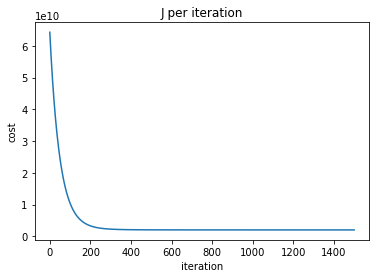

In [96]:
plt.plot(J_history)
plt.title('J per iteration')
plt.xlabel('iteration')
plt.ylabel('cost')

If we want to make a prediction on a normalized dataset, we have to normalize our input too.

In [100]:
X_0 = np.array([[1650, 3]])
X_0 = (X_0 - mu) / sigma
X_0 = np.append(np.ones((1, 1)), X_0, axis=1)

price = X_0 @ theta # normalize the input
'In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price

'In a house of 1650 square feet with 3 rooms, we predict a price of $293098.47'

### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$
\theta = \left(X^T X\right)^{-1} X^T \vec{y} 
$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

Complete the code in `normalEqn.m` to use the formula above to calculate $\theta$, then run the code in this section. Remember that while you don't need to scale your features, we still need to add a column of 1's to the X matrix to have an intercept term $(\theta_0)$ . Note that the code below will add the column of 1's to X for you.

```matlab
% Solve with normal equations:
% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations:\n%f\n%f\n%f', theta(1),theta(2),theta(3));
```

**Optional (ungraded) exercise:** Now, once you have found  using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent (in Section 3.2.1).

```matlab
% Estimate the price of a 1650 sq-ft, 3 br house. 
% ====================== YOUR CODE HERE ======================

price = []; % Enter your price forumla here

% ============================================================

fprintf('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n $%f', price); 
```

#### Python version

We can use normal equations to get the exact solution in only one calculation. Although using normal equations is very fast for a small datasets with a small number of features, it can be inefficient for larger datasets because the complexity of matrix multiplication is $O(n^3)$.

The normal equation for linear regression is:

$$
\theta = (X^TX)^{−1}X^T\vec{y}
$$

**Exercise:** Find theta using normal equations.

In [105]:
def normal_equ(X, y):
    theta = np.linalg.inv((X.T @ X)) @ X.T @ y

    return theta

# don't forget to reload the dataset

Roload the dataset from the previous section and run the code below to find theta using normal equations.

In [102]:
# load data
data = pd.read_csv("ex1data2.txt", header = None, names=["Size", "Bedrooms","Price"])
m = len(data)

# Initialize X, y and theta
# x0 = np.ones(m)
size = np.array((data["Size"]))
bedrooms = np.array((data["Bedrooms"]))

X = np.array([size, bedrooms]).T
y = np.array(data["Price"]).reshape(len(data.index), 1)

X = np.append(np.ones((m, 1)), X, axis=1)

In [106]:
theta = normal_equ(X, y)
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [108]:
X_1 = np.array([[1, 1650, 3]])
price = X_1 @ theta# normalize the input
'In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price

'In a house of 1650 square feet with 3 rooms, we predict a price of $293081.46'

## Reference

- https://github.com/rickwierenga/CS229-Python/blob/master/ex1/PE1%20-%20Linear%20Regression%20(Solutions).ipynb
- https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes/blob/master/code/ex1-linear%20regression/ML-Exercise1.ipynb
- https://github.com/mGalarnyk/datasciencecoursera/blob/master/Stanford_Machine_Learning/Week2/Assignment/Python/Assignment1-Linear%20Regression.ipynb